In [1]:
pip install pandas scikit-learn


In [13]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
# import graphviz
# import numpy as np

# # Load the UCI Heart Disease dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
# heart_data = pd.read_csv(url, names=column_names, na_values="?")

# # Drop rows with missing values
# heart_data.dropna(inplace=True)

# # Convert target variable into binary (0 = No Disease, 1+ = Disease)
# heart_data["target"] = heart_data["target"].apply(lambda x: 1 if x > 0 else 0)

# # Separate features and target variable
# X = heart_data.drop("target", axis=1)
# y = heart_data["target"]

# # Encode categorical variables
# X = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Decision Tree Classifier
# tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
# tree_clf.fit(X_train, y_train)

# # **1. Visualize using Matplotlib**
# plt.figure(figsize=(20,10))
# plot_tree(tree_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
# plt.show()

# # **2. Visualize using Graphviz**
# dot_data = export_graphviz(
#     tree_clf, out_file=None, feature_names=X.columns, class_names=["No Disease", "Disease"],
#     filled=True, rounded=True, special_characters=True
# )

# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # Saves the tree as a file
# graph  # Displays in Jupyter Notebook


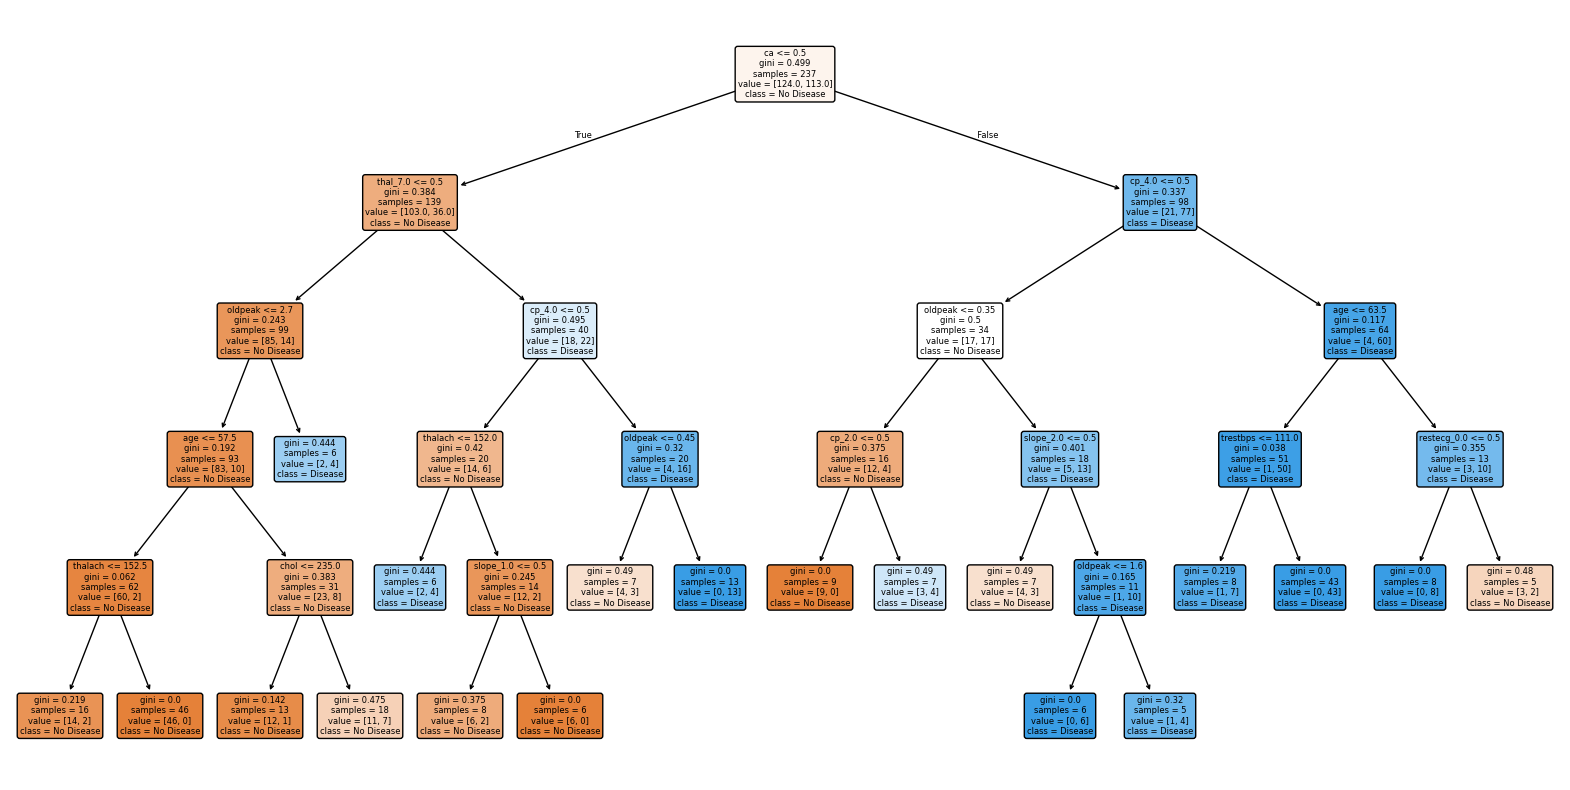

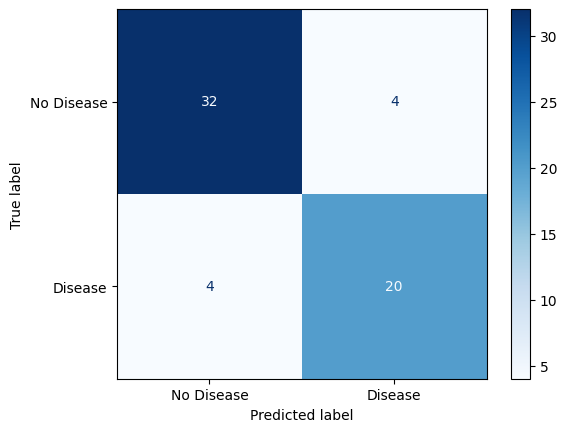

Accuracy: 0.87
Precision: 0.83
Recall: 0.83
F1-Score: 0.83


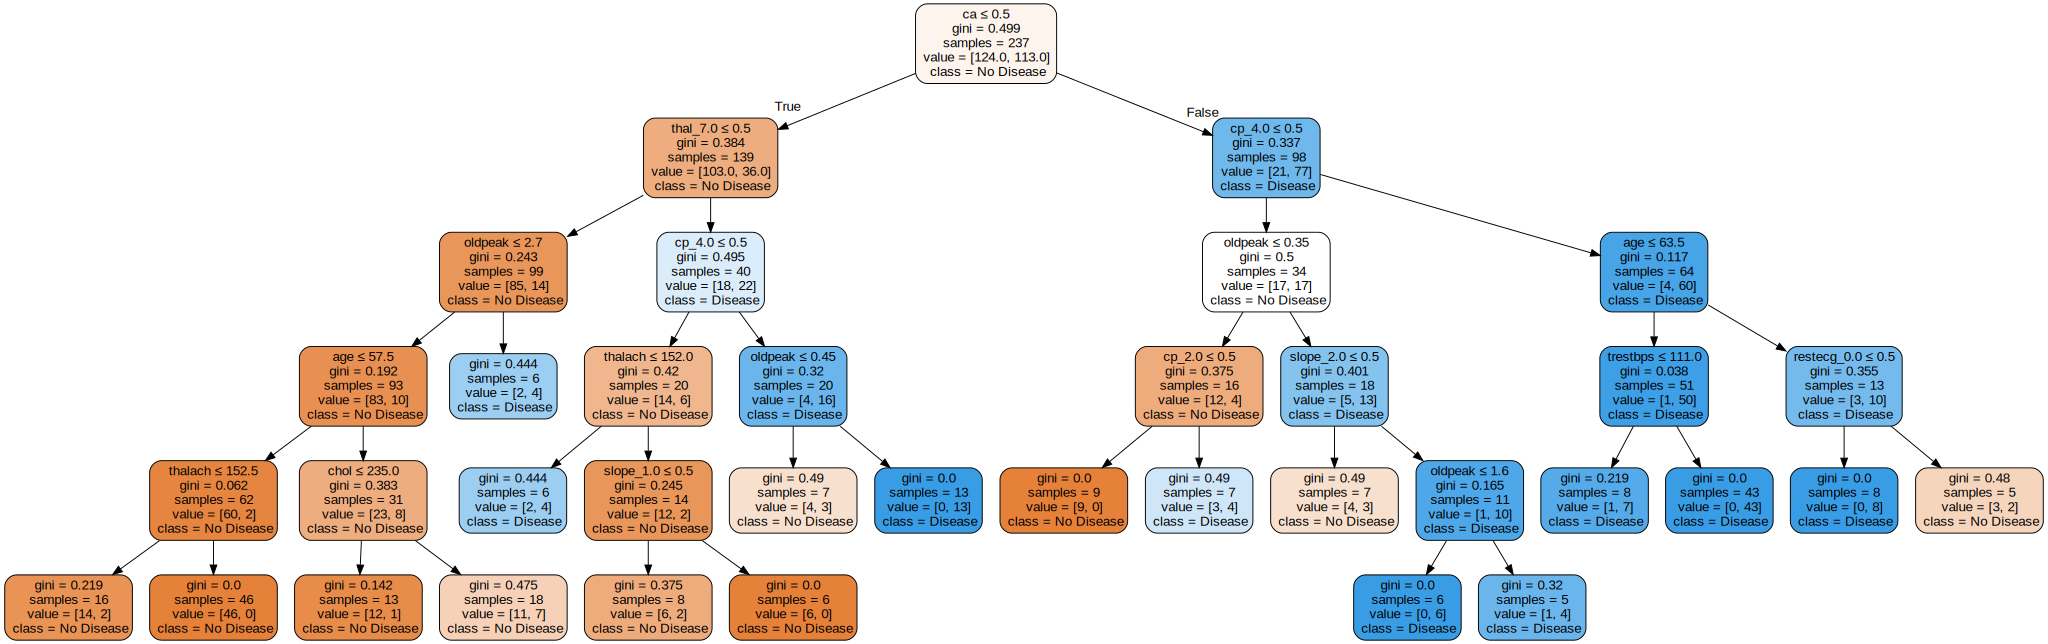

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import graphviz
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart_data = pd.read_csv(url, names=column_names, na_values="?")

# Drop rows with missing values
heart_data.dropna(inplace=True)

# Convert target variable into binary (0 = No Disease, 1+ = Disease)
heart_data["target"] = heart_data["target"].apply(lambda x: 1 if x > 0 else 0)

# Separate features and target variable
X = heart_data.drop("target", axis=1)
y = heart_data["target"]

# Encode categorical variables
X = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Prune the Decision Tree**
tree_clf = DecisionTreeClassifier(
    max_depth=5,         # Limiting tree depth for pruning
    min_samples_split=10,  # Minimum samples to split an internal node
    min_samples_leaf=5,    # Minimum samples at a leaf node
    random_state=42
)
tree_clf.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.show()

# Make predictions
y_pred = tree_clf.predict(X_test)

# **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Optionally, you can save the pruned tree as a Graphviz file
dot_data = export_graphviz(
    tree_clf, out_file=None, feature_names=X.columns, class_names=["No Disease", "Disease"],
    filled=True, rounded=True, special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("pruned_decision_tree")  # Saves the pruned tree as a file
graph  # Displays in Jupyter Notebook


In [14]:
# # Ensure you have the necessary import
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Make predictions
# y_pred = tree_clf.predict(X_test)

# # **Confusion Matrix**
# cm = confusion_matrix(y_test, y_pred)

# # Display the confusion matrix using scikit-learn
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # Calculate accuracy (optional)
# accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()  # or you can use accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Optionally, you can also calculate other metrics (Precision, Recall, F1-Score)
# from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")
